#### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
feature_names=boston.feature_names

Создайте датафреймы X и y из этих данных.

In [4]:
X = pd.DataFrame(boston.data, columns=feature_names)
y = pd.DataFrame(boston.target, columns=['target'])

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
X_train_scaled = scaler.fit_transform(X_train)

In [10]:
X_test_scaled = scaler.transform(X_test)

In [11]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [12]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [13]:
from sklearn.manifold import TSNE

In [14]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [15]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

Постройте диаграмму рассеяния на этих данных.

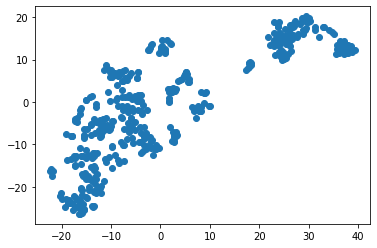

In [16]:
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1])

#### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [17]:
from sklearn.cluster import KMeans

In [18]:
model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [19]:
train_labels = model.fit_predict(X_train)
train_labels

array([2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0,
       2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 1, 0, 0, 0,
       0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0,

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

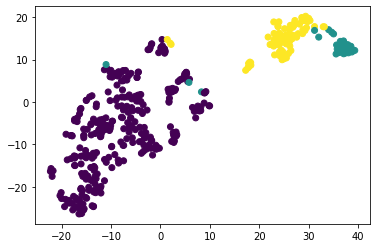

In [20]:
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1], c=train_labels)

Вычислите средние значения price и CRIM в разных кластерах.

In [21]:
X_train['Clasters'] = train_labels

<ipython-input-21-93f6cd7a13d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Clasters'] = train_labels


In [22]:
y_train['Clasters'] = train_labels

<ipython-input-22-9d21f55b1454>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['Clasters'] = train_labels


In [23]:
y_train.groupby('Clasters')['target'].mean()

Clasters
0    25.168687
1    13.196774
2    17.442105
Name: target, dtype: float64

In [24]:
X_train.groupby('Clasters')['CRIM'].mean()

Clasters
0     0.404863
1    14.360380
2    11.745662
Name: CRIM, dtype: float64

#### Задание 3

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

In [25]:
test_labels = model.fit_predict(X_test)
test_labels

array([1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 0, 0, 1, 1], dtype=int32)

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [26]:
X_test['Clasters'] = test_labels
y_test['Clasters'] = test_labels

<ipython-input-26-14b86f4b8910>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Clasters'] = test_labels
<ipython-input-26-14b86f4b8910>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Clasters'] = test_labels


In [27]:
y_test.groupby('Clasters')['target'].mean()

Clasters
0    12.814286
1    23.911594
2    17.392308
Name: target, dtype: float64

In [28]:
X_test.groupby('Clasters')['CRIM'].mean()

Clasters
0    19.021666
1     0.246421
2     8.469302
Name: CRIM, dtype: float64

##### Видимо изменились обозначения кластеров относительно тренировочного набора данных - средние значения похожи, но не в том порядке.